In [41]:
import numpy
import pandas
import matplotlib.pyplot
import matplotlib.style
matplotlib.style.use('ggplot')

%matplotlib inline

In [2]:
titanic_data =  pandas.read_csv('Titanic.csv', index_col=None)

How many passengers we know?

In [3]:
passengers_num = titanic_data.shape[0] #rows in Titanic.csv table
print(passengers_num)

1313


How many of them survived?

In [5]:
survived = titanic_data[titanic_data.loc[:, 'Survived'] == True] #rows from Titanic.csv, column 'Survived'
survived_num = survived.shape[0] #number of rows with 1
survived_percent = survived_num / (passengers_num / 100)
print('{} out of {} (~{:.5f} %)'.format(survived_num, passengers_num, survived_percent))

450 out of 1313 (~34.27266 %)


How many men survived? How many women?

In [6]:
men = titanic_data[titanic_data.loc[:, 'Sex'] == 'male']
men_num = men.shape[0]
women_num = passengers_num - men_num

men_survived = men[men.loc[:, 'Survived'] == True]
men_survived_num = men_survived.shape[0]
women_survived_num = survived_num - men_survived_num

men_survived_percent = men_survived_num / (men_num / 100)
women_survived_percent = women_survived_num / (women_num / 100)

print('Men survived: {} out of {} (~{:.5f} %)'.format(men_survived_num, men_num, men_survived_percent))
print('Women survived: {} out of {} (~{:.5f} %)'.format(women_survived_num, women_num, women_survived_percent))

Men survived: 142 out of 851 (~16.68625 %)
Women survived: 308 out of 462 (~66.66667 %)


Stats for each class:

In [7]:
classes = titanic_data.PClass.unique()
cols = ['class', 'survived', 'deceased', 'total', 'percent']
classes_data = pandas.DataFrame()

for cls in classes:
    total = titanic_data[titanic_data.loc[:, 'PClass'] == cls]
    total_num = total.shape[0]
    
    survived = total[total.loc[:, 'Survived'] == True]
    survived_num = survived.shape[0]
    deceased_num = total_num - survived_num
    
    percent = survived_num / (total_num / 100)
    row = pandas.DataFrame([{'class' : cls, 'survived' : survived_num, 
                         'deceased' : deceased_num, 'total' : total_num, 
                         'percent' : percent}], columns=cols)
    classes_data = classes_data.append(row, ignore_index=True)

classes_data

,class,survived,deceased,total,percent
0,1st,193,129,322,59.937888
1,2nd,119,160,279,42.652330
2,*,0,1,1,0.000000
3,3rd,138,573,711,19.409283


Survival rate based on age:

In [13]:
max_age = titanic_data.loc[:, 'Age'].max()
survived_ages = pandas.DataFrame(columns=['decade', 'survived', 'total'])
for decade in range(0,int(max_age),10):
    total_decade = titanic_data[(titanic_data.loc[:, 'Age'] >= decade) &
                                   (titanic_data.loc[:, 'Age'] <  decade + 10)]
    
    survived_decade = total_decade[total_decade.loc[:, 'Survived'] == True]
    
    row = pandas.DataFrame([{'decade' : '{}-{}'.format(decade, decade + 9), 
                             'survived' : survived_decade.shape[0], 
                             'total' : total_decade.shape[0]}])
    
    survived_ages = survived_ages.append(row, ignore_index=True)

total_na = titanic_data[titanic_data.loc[:, 'Age'].isnull()]
survived_na = total_na[total_na.loc[:, 'Survived'] == True]

row = pandas.DataFrame([{'decade' : 'No age data', 
                         'survived' : survived_na.shape[0], 
                         'total' : total_na.shape[0]}])

survived_ages = survived_ages.append(row, ignore_index=True)

survived_ages

,decade,survived,total
0,0-9,37.0,53.0
1,10-19,44.0,96.0
2,20-29,84.0,252.0
3,30-39,70.0,168.0
4,40-49,43.0,106.0
5,50-59,26.0,54.0
6,60-69,9.0,23.0
7,70-79,0.0,4.0
8,No age data,137.0,557.0


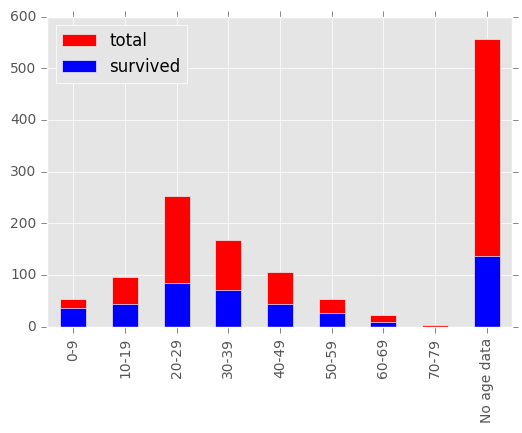

In [59]:
survived_ages['total'].plot.bar(color='r')
survived_ages['survived'].plot.bar(color='b')

matplotlib.pyplot.legend(loc='upper left')
matplotlib.pyplot.xticks(list(range(len(survived_ages))), survived_ages['decade'].values, rotation = 'vertical')
matplotlib.pyplot.show()